## Homework 8 - Machine Learning with Python
### Author: Val Wong - vmw170030
#### 4/20/2021

---
### Step 1 - Read the Auto Data
Use pandas in order to read the Auto data.
Print first few rows and print the dimensions of the data.

In [19]:
import pandas as pd   
df = pd.read_csv("Auto.csv")   
print(df.head())                
print('\nDimensions of the data frame:', df.shape)


    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions of the data frame: (392, 9)


---
### Step 2 - Data Exploration with Code

Use describe() on the 'mpg', 'weight', and 'year' columns.

The range of the **mpg** column are from 17.0 to 46.6. The average is 23.445918.

The range of the **weight** column are from 1613.0 to 5410.0. The average is 2977.587184.

The range of of the **year** column are from 70.0 to 82.0. The average is 76.010256.

In [20]:
df[['mpg', 'weight', 'year']].describe()

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


---
### Step 3 - Explore Data Types
Check the data types of all columns.

In [21]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

Change the cylinders column to categorical (use cat.codes).\
Change the origin column to categorical (don't use cat.codes).\
Verify the changes with the dtypes attribute.

In [22]:
df1 = df.copy()
df1.cylinders = df.cylinders.astype('category').cat.codes
df1.origin = df.origin.astype('category')
df1.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

---
### Step 4 - Deal with NAs
Delete rows with NAs, then print the new dimensions.

In [23]:
print('\nDimensions of the original data frame:', df.shape)
df1 = df1.dropna()
print('\nDimensions of the Dropped NAs data frame:', df1.shape)


Dimensions of the original data frame: (392, 9)

Dimensions of the Dropped NAs data frame: (389, 9)


---
### Step 5 - Modify Columns

In [24]:
import numpy as np
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,4,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,4,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,4,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,4,304.0,150,3433,12.0,70.0,1,amc rebel sst
6,14.0,4,454.0,220,4354,9.0,70.0,1,chevrolet impala


Make a new column, **mpg_high**, which is categorical. 1 if mpg > average mpg, else 0.\
Delete the mpg and name columns.\
Print the first few rows of the modified data frame.

In [25]:
df2 = df1.copy()
df2['mpg_high'] = np.where(df1['mpg'] > np.mean(df1.mpg), 1, 0)
df2 = df2.drop(columns=['mpg', 'name'])
df2.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


---
### Step 6 - Data Exploration with Graphs

For each graph, write a comment indicating one thing you learned about the data from the graph.

**Graph:** seaborn catplot on the mpg_high column.

**There are more occurences of 0 which indicate that there are more occurrences where mpg is equal or less than the mpg average.**

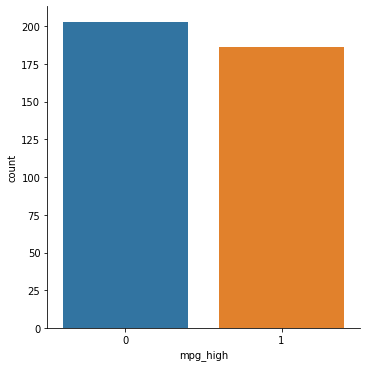

In [26]:
import seaborn as sb
sb.catplot(x='mpg_high', kind='count', data=df2)

**Graph:** seaborn relplot with horsepower on the x axis, weight on the y axis, setting 
hue or style to mpg_high

**For mpgs that are less than or equal to the mpg average, they tend to be heavier than those with mpgs greater than the mpg average.**

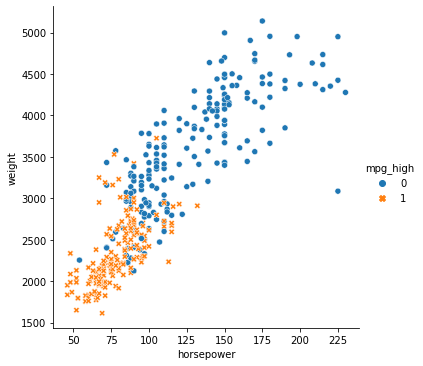

In [27]:
sb.relplot(x='horsepower', y='weight', data=df2, hue=df2.mpg_high, 
           style=df2.mpg_high)

**Graph:** seaborn boxplot with mpg_high on the x axis and weight on the y axis

**The mean weight is higher and range wider for those classified as equal or less than the mpg average than those classified as higher than the mpg average**

<AxesSubplot:xlabel='mpg_high', ylabel='weight'>

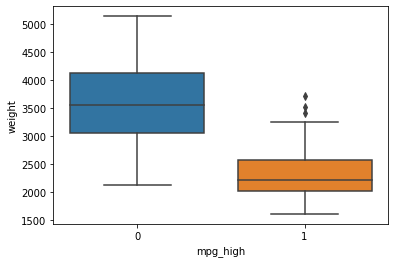

In [28]:
sb.boxplot(x='mpg_high', y='weight', data=df2)

---
### Step 7 - Train\Test Split
a.	80/20\
b.	use seed 1234 so we all get the same results\
c.	train/test X data frames consists of all remaining columns except mpg_high\
d.	print the dimensions of train and test

In [29]:
from sklearn.model_selection import train_test_split

X = df2.iloc[:, 0:6]
y = df2.iloc[:, 7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 6)
test size: (78, 6)


---
### Step 8 - Logistic Regression
Train a logistic regression model using solver lbfgs.

In [30]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression(solver='lbfgs')
glm.fit(X_train, y_train)
glm.score(X_train, y_train)

0.9035369774919614

Test and evaluate. Print metrics using the classification report.

In [31]:
glm_pred = glm.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, glm_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, glm_pred)

array([[40, 10],
       [ 1, 27]], dtype=int64)

---
### Step 9 - Decision Tree

Train a decision tree.

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Test and evaluate. Print the classification report metrics.

In [34]:
dt_pred = dt.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.84      0.93      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



Plot the tree

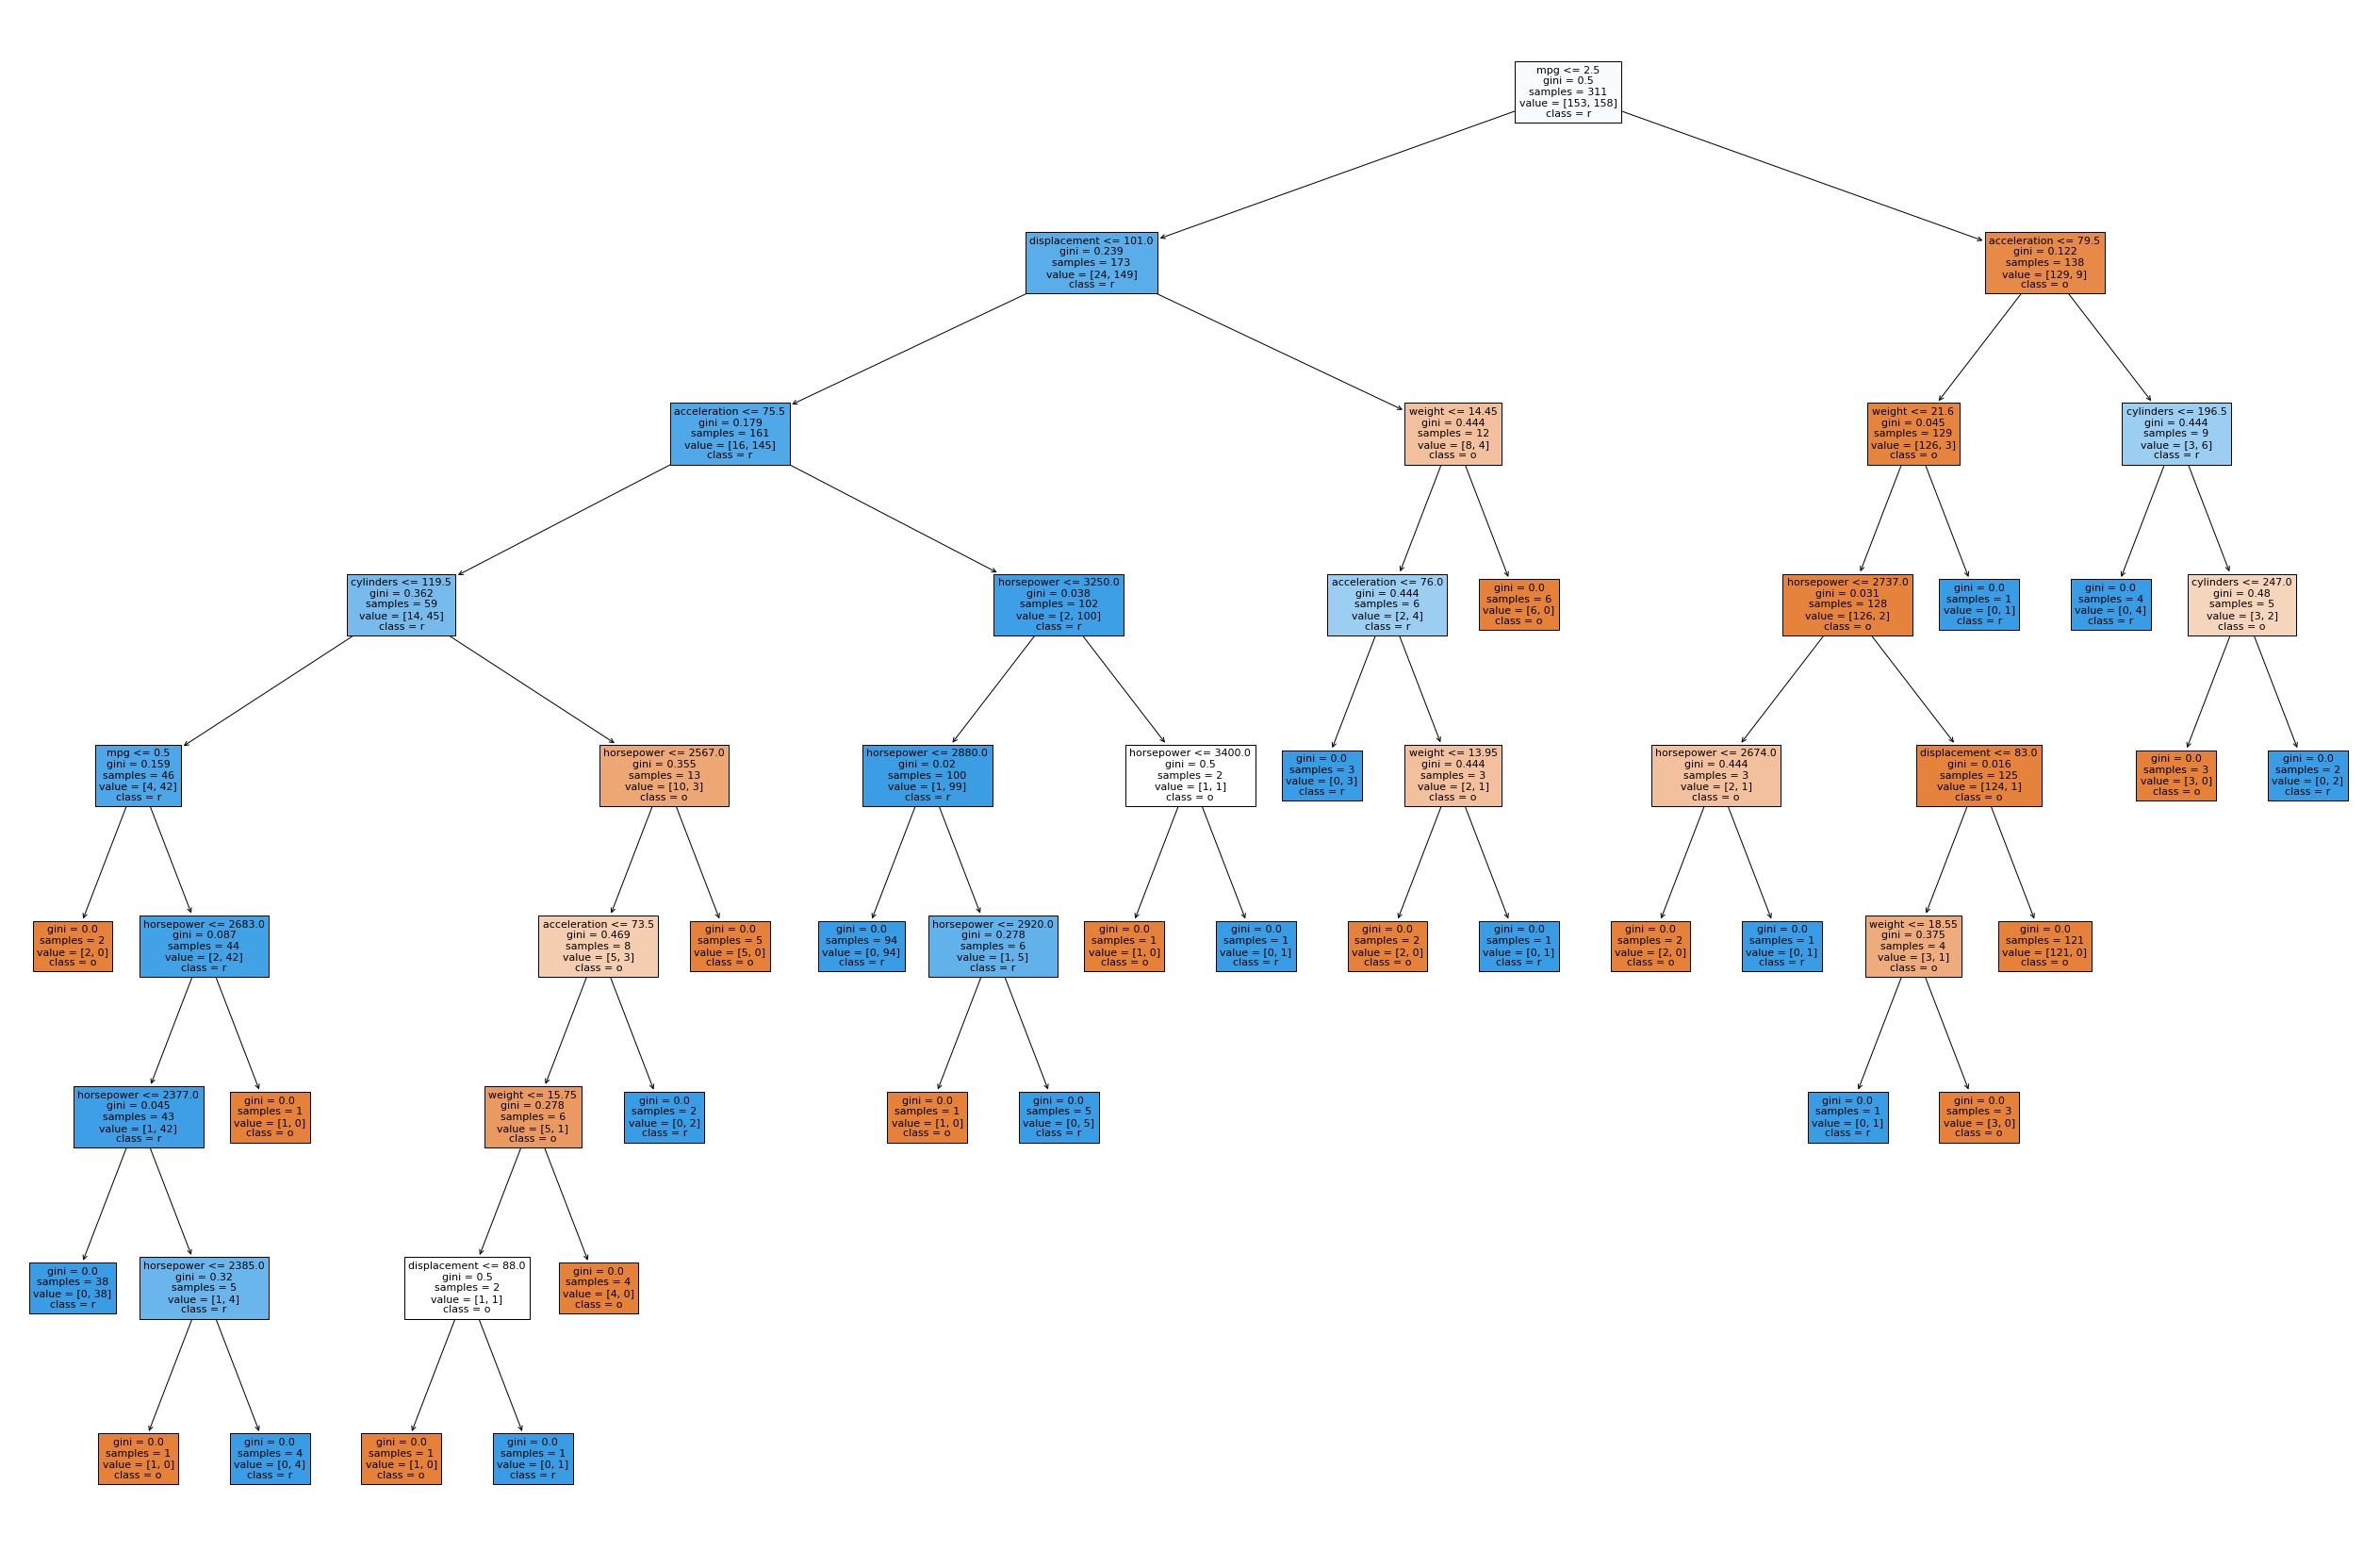

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot = plt.figure(figsize=(45,30))
plot1 = plot_tree(dt, feature_names=df.columns[0:6],
                 class_names=df.columns[7], filled=True)

---
### Step 10 - Analysis

In [36]:
# Logistic Regression
print("\tLogistic Regression\t")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy Score: ', accuracy_score(y_test, glm_pred))
print('Precision Score: ', precision_score(y_test, glm_pred))
print('Recall Score: ', recall_score(y_test, glm_pred))
print('F1 Score: ', f1_score(y_test, glm_pred))

# Decision Tree
print("\n\tDecision Tree\t")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy Score: ', accuracy_score(y_test, dt_pred))
print('Precision Score: ', precision_score(y_test, dt_pred))
print('Recall Score: ', recall_score(y_test, dt_pred))
print('F1 Score: ', f1_score(y_test, dt_pred))

	Logistic Regression	
Accuracy Score:  0.8589743589743589
Precision Score:  0.7297297297297297
Recall Score:  0.9642857142857143
F1 Score:  0.8307692307692307

	Decision Tree	
Accuracy Score:  0.9102564102564102
Precision Score:  0.8387096774193549
Recall Score:  0.9285714285714286
F1 Score:  0.8813559322033899


**A. Which Algorithm performed better?**

The Decision Tree Classifier model performed tad bit better than the Logistic Regression model.

**B. Compare Accuracy, Recall, and Precision metrics by class**

The Decision Tree Classification model performed only a bit better accuracy score than Logistic Regression's accuracy score, about a hundredth's place difference. In addition, Decision Tree, achieved much higher Precision score than glm.

However, in terms of the Recall Score, Logistic Regression rendered a better/higher value than Decision Tree.

**C. Give your analysis of why the better-performing algorithm might have outperformed the other.**

When the relationship between the predictors and target are not necessarily or particularly linear and proves to be more complex, Decision Trees tend to outperform linear models. Logistic Regression would have outperformed Decision Tree if the classes were more linearly separable but could also prove to do worse as logistic regression modeling are prone to underfitting data that might be too complex.

